In [44]:
import numpy as np
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import great_tables as tg

In [45]:
df = pl.read_csv("../../DATA/bank-full.csv")

In [46]:
df

age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
i64,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,str,f64,f64,f64,f64,f64,str
56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",261,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",149,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",226,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",151,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",307,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",334,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",383,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",189,2,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""


In [68]:
df = df.with_columns( # 5.632292747497559
    pl.col('age').cast(pl.UInt16), # 5.396613121032715
    pl.col('job').str.replace(r'\.', ''), # 5.386673927307129
    pl.col('duration').cast(pl.UInt32), # 5.229554176330566
    pl.col('campaign').cast(pl.UInt8), # 4.954594612121582
    pl.col('pdays').cast(pl.UInt16), # 4.718914985656738
    pl.col('previous').cast(pl.UInt16), # 4.4832353591918945
    pl.col('emp.var.rate').cast(pl.Float32), # 4.326115608215332
    pl.col('cons.price.idx').cast(pl.Float32), # 4.1689958572387695
    pl.col('cons.conf.idx').cast(pl.Float32), # 4.011876106262207
    pl.col('euribor3m').cast(pl.Float32), # 3.8547563552856445
    pl.col('nr.employed').cast(pl.Float32), # 3.697636604309082
)

In [73]:
reduced_memory_size = 3.697636604309082
original_memory_size = 5.632292747497559

percentage_reduction = (reduced_memory_size * 100) / original_memory_size
percentage_reduction.__round__(2)

65.65

In [74]:
df

age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
u16,str,str,str,str,str,str,str,str,str,u32,u8,u16,u16,str,f32,f32,f32,f32,f32,str
56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",261,1,999,0,"""nonexistent""",1.1,93.994003,-36.400002,4.857,5191.0,"""no"""
57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",149,1,999,0,"""nonexistent""",1.1,93.994003,-36.400002,4.857,5191.0,"""no"""
37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",226,1,999,0,"""nonexistent""",1.1,93.994003,-36.400002,4.857,5191.0,"""no"""
40,"""admin""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",151,1,999,0,"""nonexistent""",1.1,93.994003,-36.400002,4.857,5191.0,"""no"""
56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",307,1,999,0,"""nonexistent""",1.1,93.994003,-36.400002,4.857,5191.0,"""no"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",334,1,999,0,"""nonexistent""",-1.1,94.766998,-50.799999,1.028,4963.600098,"""yes"""
46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",383,1,999,0,"""nonexistent""",-1.1,94.766998,-50.799999,1.028,4963.600098,"""no"""
56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",189,2,999,0,"""nonexistent""",-1.1,94.766998,-50.799999,1.028,4963.600098,"""no"""


In [49]:
df.collect_schema()

Schema([('age', UInt16),
        ('job', String),
        ('marital', String),
        ('education', String),
        ('default', String),
        ('housing', String),
        ('loan', String),
        ('contact', String),
        ('month', String),
        ('day_of_week', String),
        ('duration', Int64),
        ('campaign', Int64),
        ('pdays', Int64),
        ('previous', Int64),
        ('poutcome', String),
        ('emp.var.rate', Float64),
        ('cons.price.idx', Float64),
        ('cons.conf.idx', Float64),
        ('euribor3m', Float64),
        ('nr.employed', Float64),
        ('subscribed', String)])

In [69]:
df.estimated_size('mb')
# 5.632292747497559
# 5.396613121032715
# 5.386673927307129

3.697636604309082

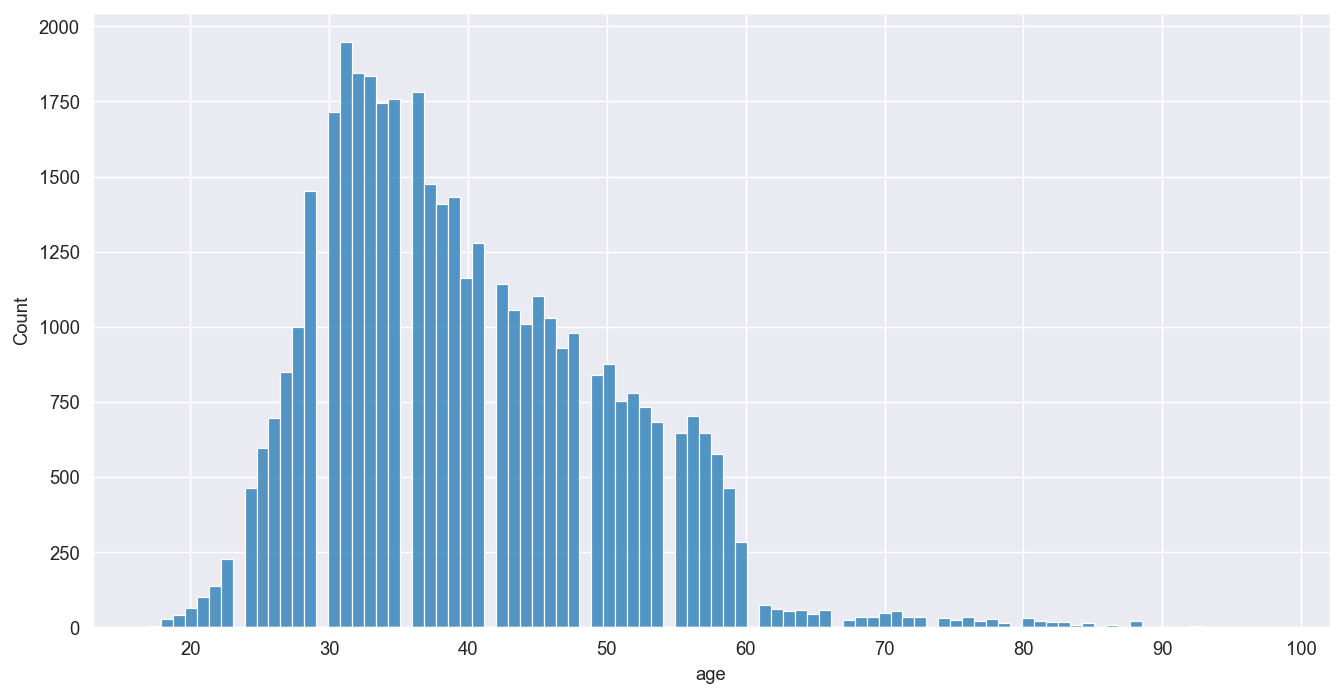

In [75]:
plt.figure(figsize=(12, 6), dpi=133)
sns.histplot(data=df, x='age')
plt.show()

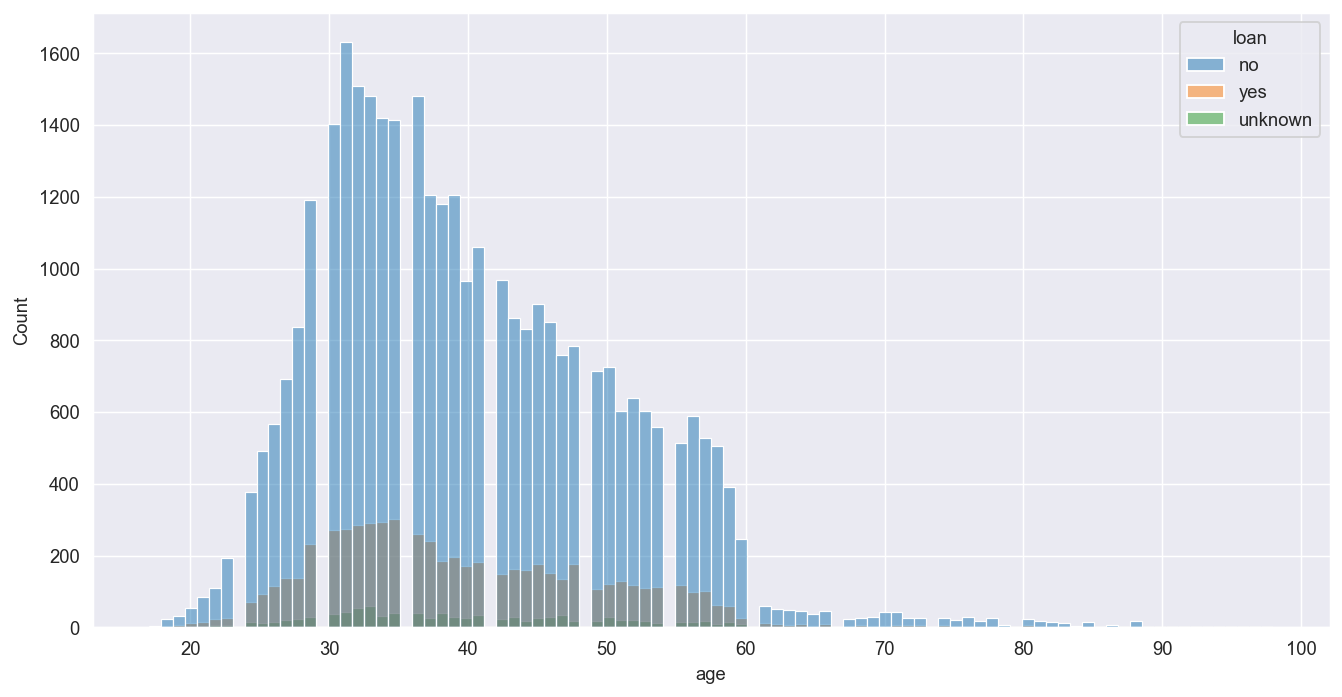

In [77]:
plt.figure(figsize=(12, 6), dpi=133)
sns.histplot(data=df, x='age', hue='loan')
plt.show()

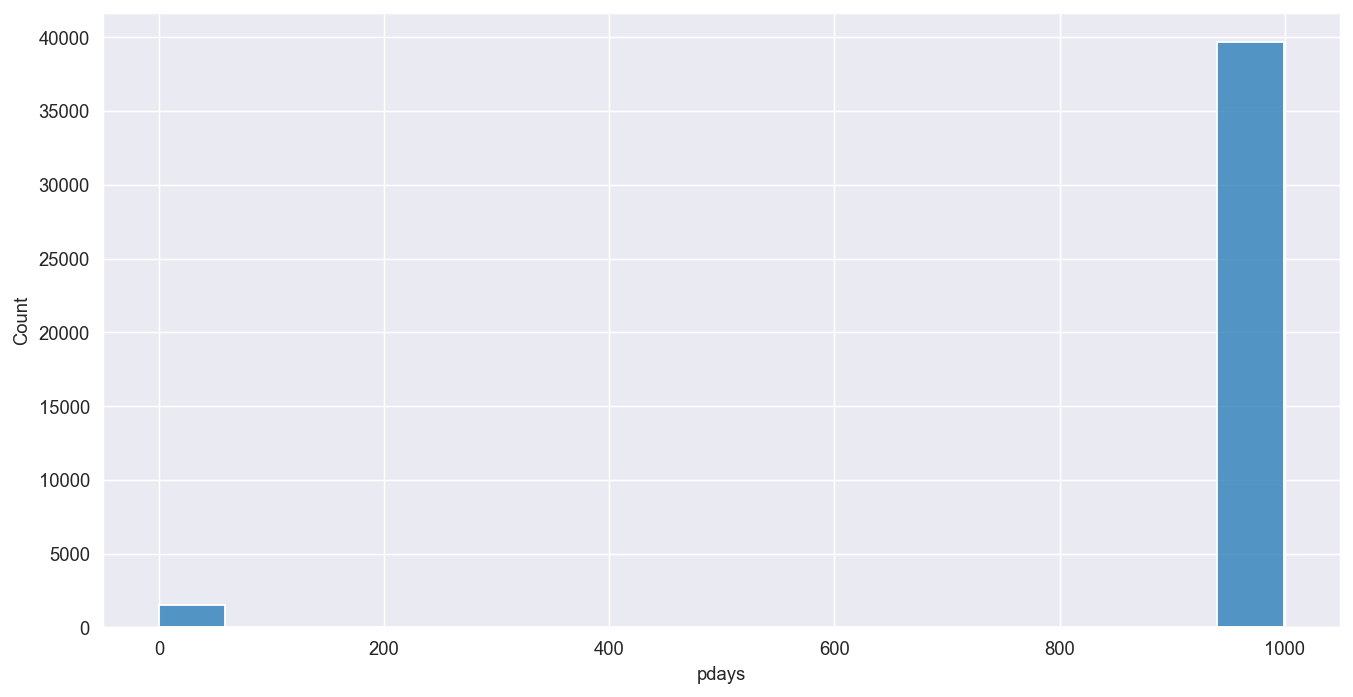

In [78]:
plt.figure(figsize=(12, 6), dpi=133)
sns.histplot(data=df, x='pdays')
plt.show()

In [85]:
df_pdays = df.filter(
    pl.col('pdays') != 999
)['pdays']

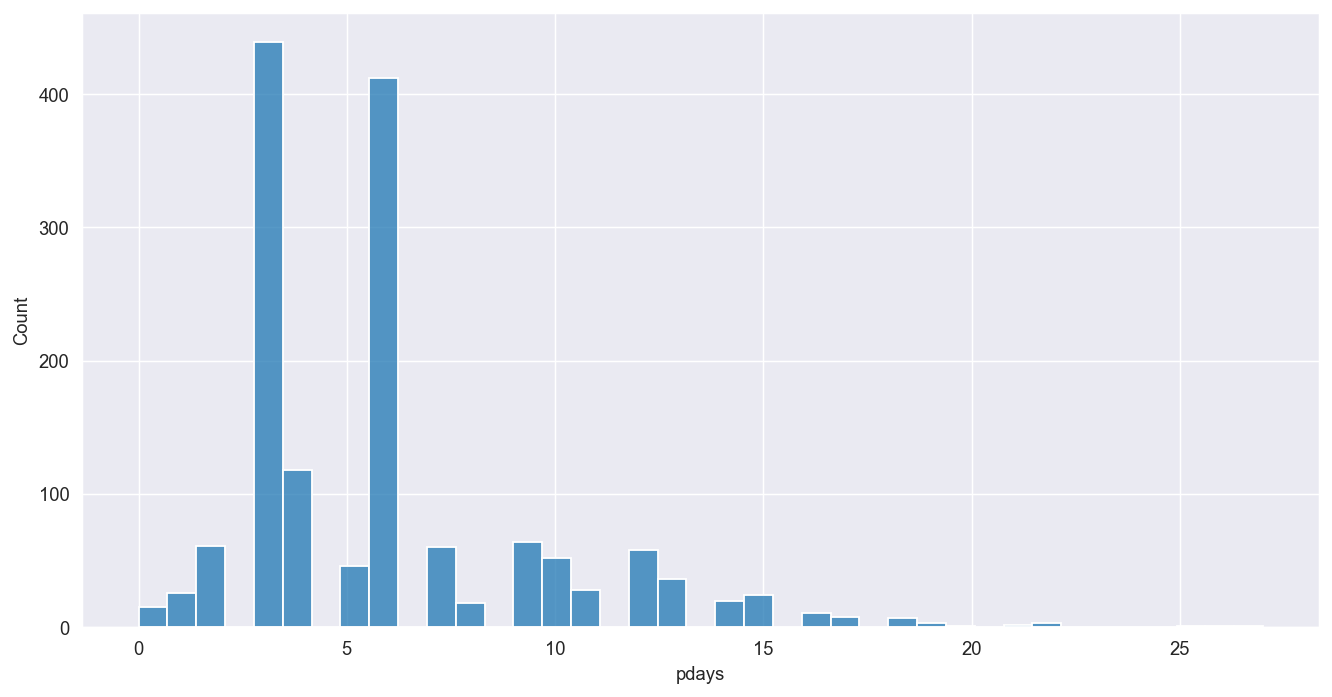

In [91]:
plt.figure(figsize=(12, 6), dpi=133)
sns.histplot(data=df_pdays.to_frame(), x='pdays')
plt.show()

(0.0, 2000.0)

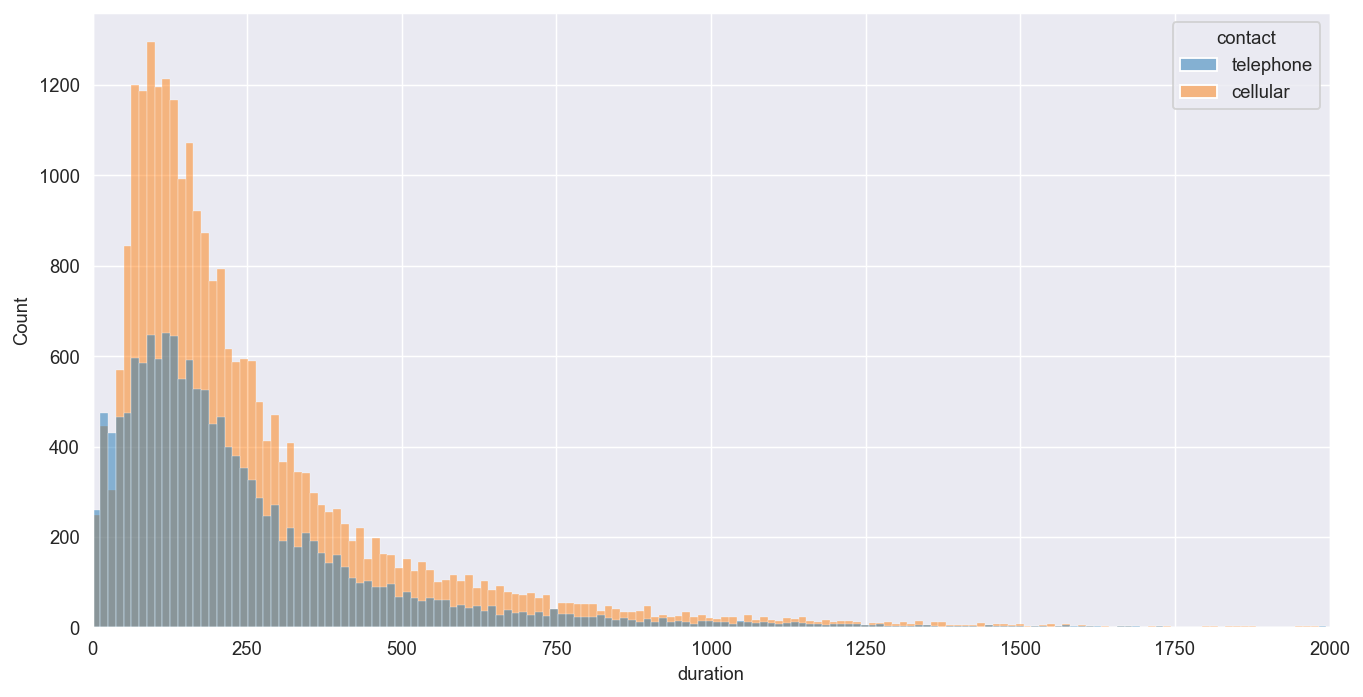

In [92]:
plt.figure(figsize=(12, 6), dpi=133)
sns.histplot(data=df, x='duration', hue='contact')
plt.xlim(0, 2000)

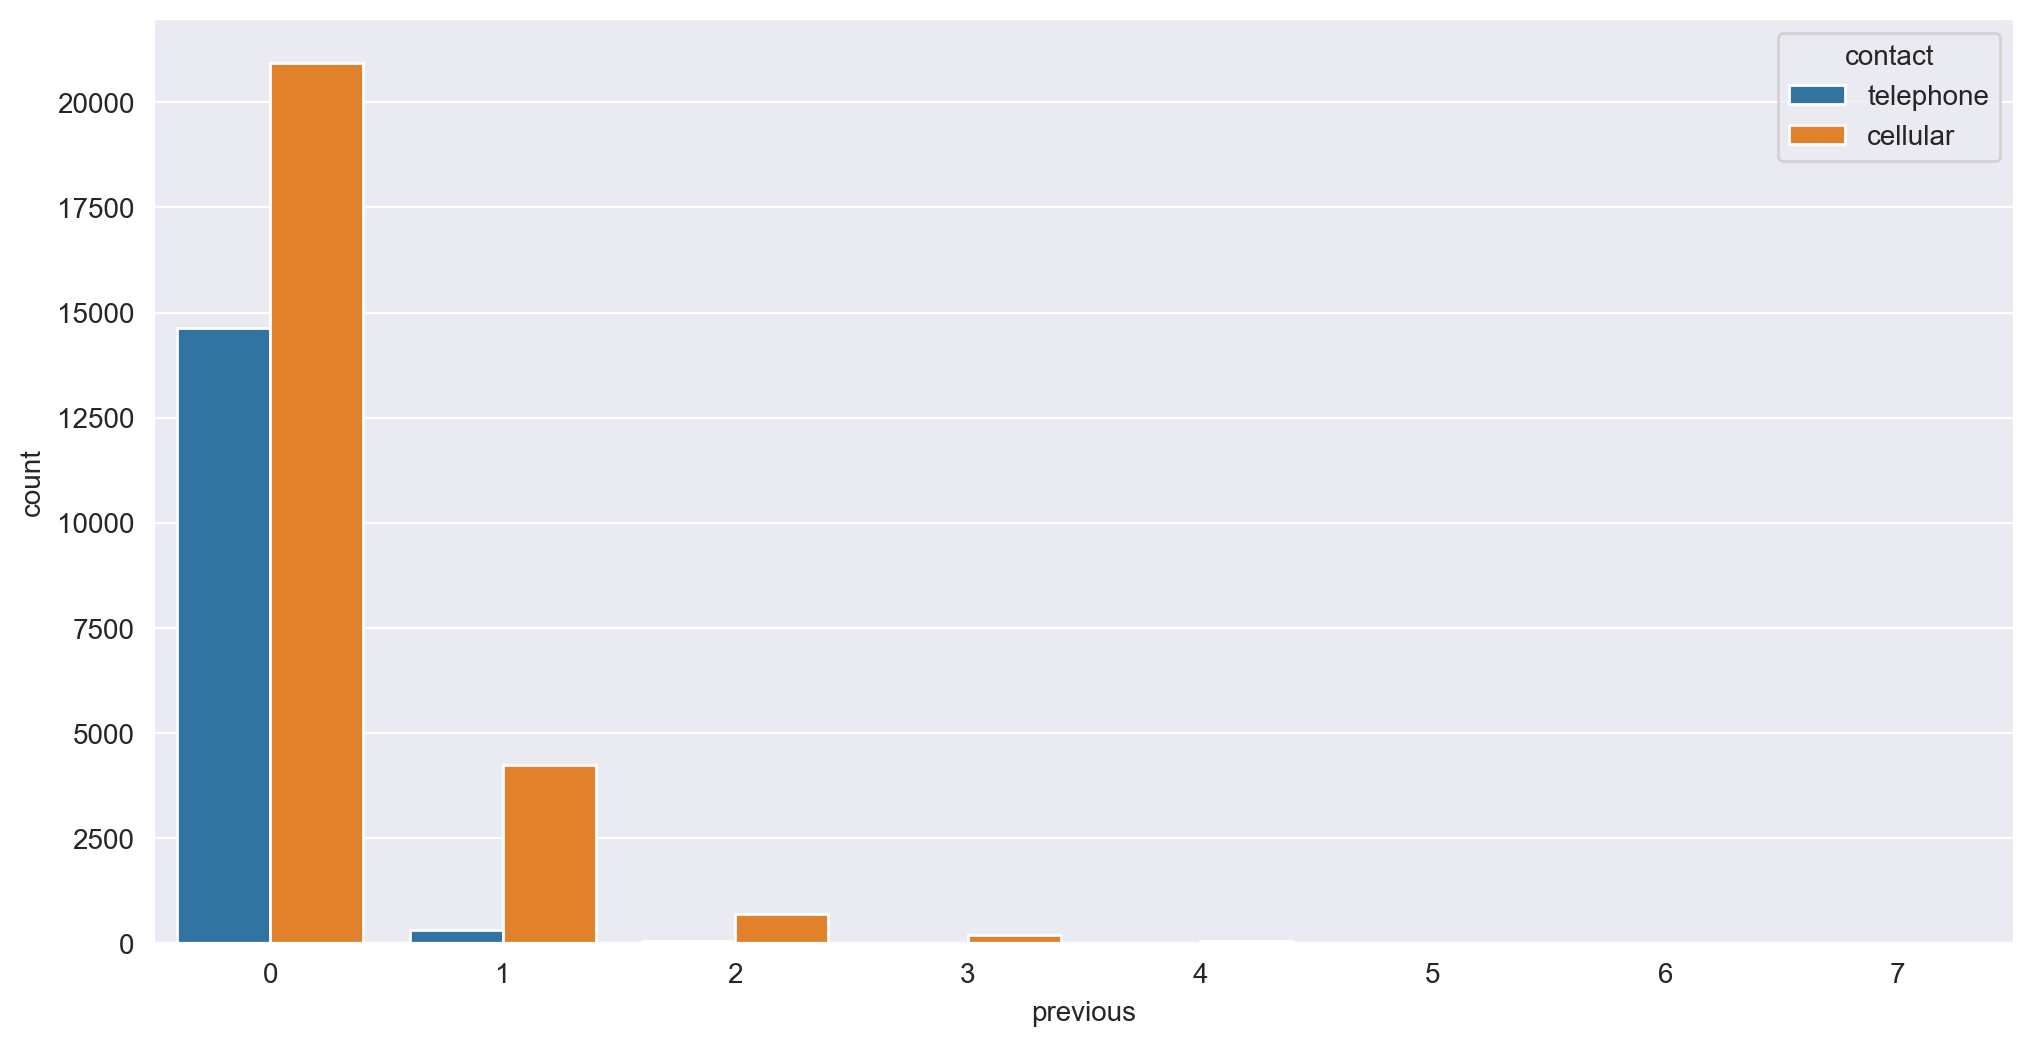

In [95]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='previous',hue='contact')
plt.show()

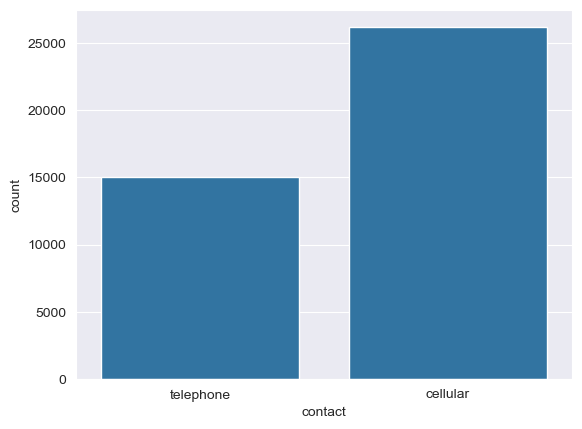

In [97]:
sns.countplot(data=df,x='contact')
plt.show()

In [100]:
df['previous'].value_counts().sum()['count'] - 36954

count
u32
4234


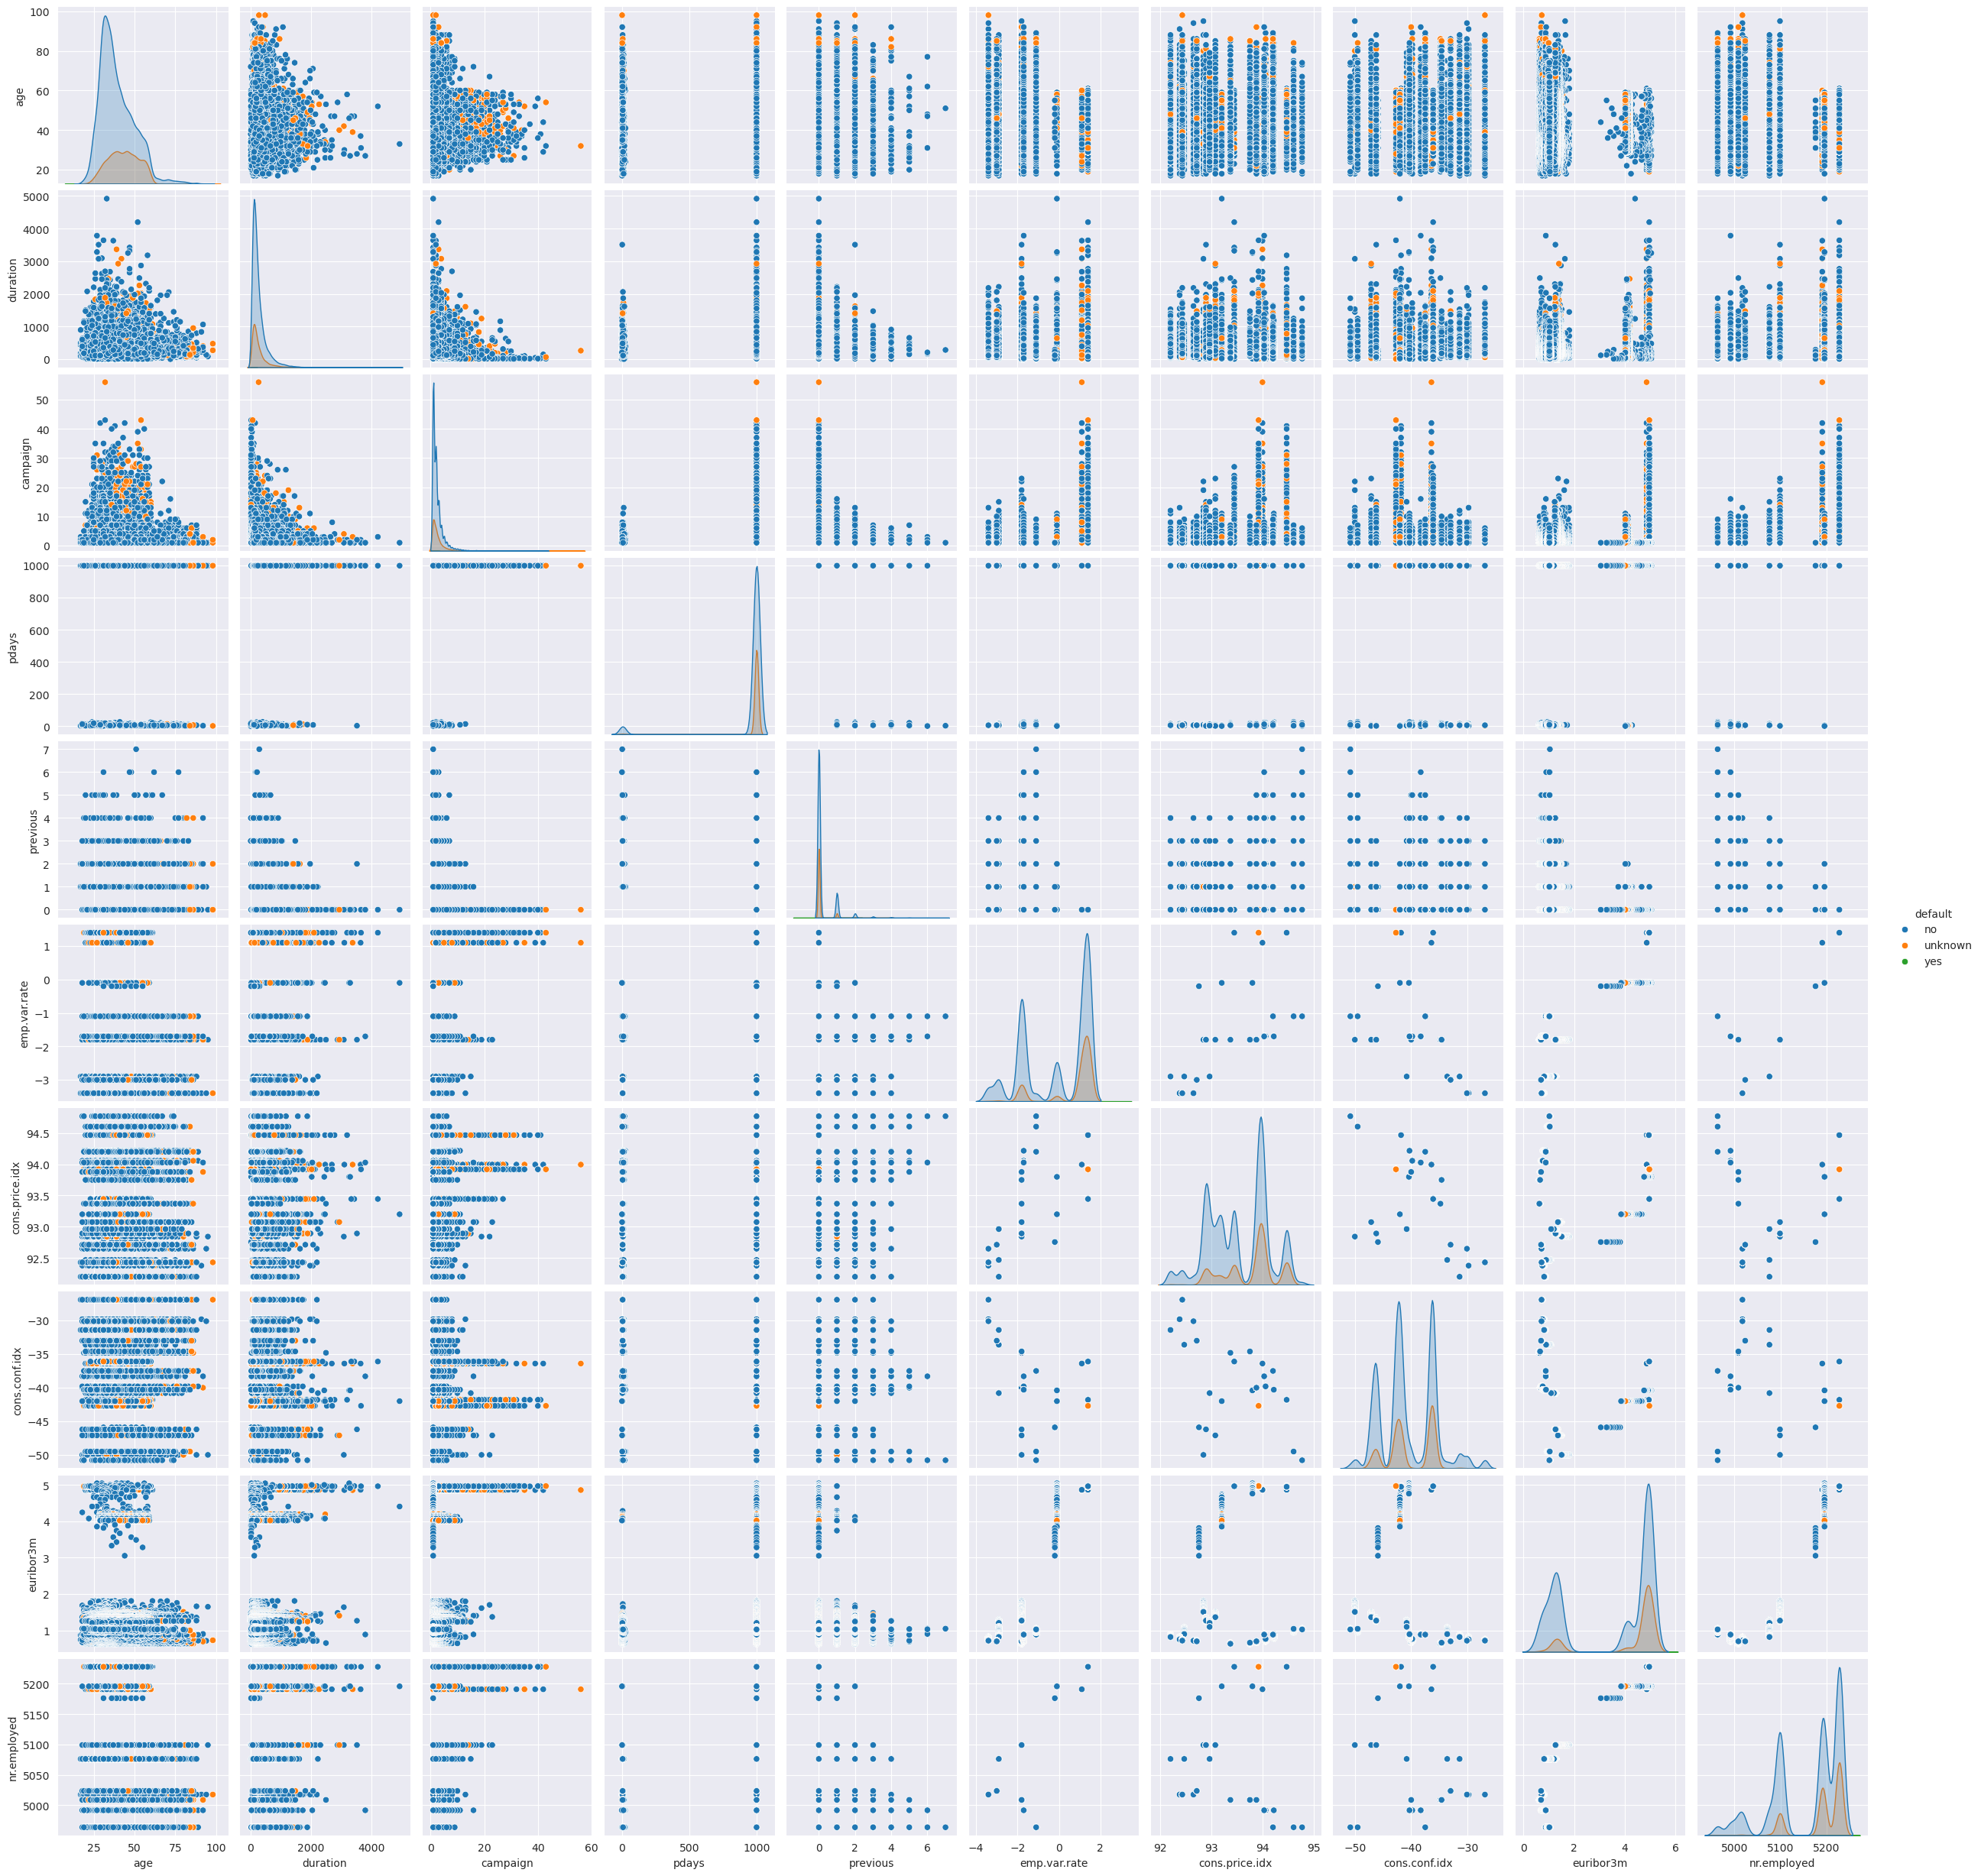

In [104]:
sns.pairplot(data=df.to_pandas(), hue='default')
plt.show()

In [172]:
X = df

In [173]:
from sklearn.preprocessing import OrdinalEncoder

In [174]:
ordinal_encoding = OrdinalEncoder()

In [175]:
X_encoded = ordinal_encoding.fit_transform(X)

In [176]:
X_encoded = pl.DataFrame(X_encoded, schema=list(X.columns))

In [177]:
X_encoded

age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
39.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,261.0,0.0,26.0,0.0,1.0,8.0,18.0,16.0,287.0,8.0,0.0
40.0,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,149.0,0.0,26.0,0.0,1.0,8.0,18.0,16.0,287.0,8.0,0.0
20.0,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,226.0,0.0,26.0,0.0,1.0,8.0,18.0,16.0,287.0,8.0,0.0
23.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,151.0,0.0,26.0,0.0,1.0,8.0,18.0,16.0,287.0,8.0,0.0
39.0,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,307.0,0.0,26.0,0.0,1.0,8.0,18.0,16.0,287.0,8.0,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
56.0,5.0,1.0,5.0,0.0,2.0,0.0,0.0,7.0,0.0,334.0,0.0,26.0,0.0,1.0,5.0,25.0,0.0,171.0,0.0,1.0
29.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,383.0,0.0,26.0,0.0,1.0,5.0,25.0,0.0,171.0,0.0,0.0
39.0,5.0,1.0,6.0,0.0,2.0,0.0,0.0,7.0,0.0,189.0,1.0,26.0,0.0,1.0,5.0,25.0,0.0,171.0,0.0,0.0


In [114]:
X

age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
u16,str,str,str,str,str,str,str,str,str,u32,u8,u16,u16,str,f32,f32,f32,f32,f32,str
56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",261,1,999,0,"""nonexistent""",1.1,93.994003,-36.400002,4.857,5191.0,"""no"""
57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",149,1,999,0,"""nonexistent""",1.1,93.994003,-36.400002,4.857,5191.0,"""no"""
37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",226,1,999,0,"""nonexistent""",1.1,93.994003,-36.400002,4.857,5191.0,"""no"""
40,"""admin""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",151,1,999,0,"""nonexistent""",1.1,93.994003,-36.400002,4.857,5191.0,"""no"""
56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",307,1,999,0,"""nonexistent""",1.1,93.994003,-36.400002,4.857,5191.0,"""no"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",334,1,999,0,"""nonexistent""",-1.1,94.766998,-50.799999,1.028,4963.600098,"""yes"""
46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",383,1,999,0,"""nonexistent""",-1.1,94.766998,-50.799999,1.028,4963.600098,"""no"""
56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",189,2,999,0,"""nonexistent""",-1.1,94.766998,-50.799999,1.028,4963.600098,"""no"""


In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
scaler = StandardScaler()

In [180]:
scaled_X = scaler.fit_transform(X_encoded)

In [181]:
scaled_X

array([[ 1.5334083 , -0.20157925, -0.2837415 , ...,  0.45678474,
         0.0628044 , -0.35630932],
       [ 1.62938803,  0.91122681, -0.2837415 , ...,  0.45678474,
         0.0628044 , -0.35630932],
       [-0.29020655,  0.91122681, -0.2837415 , ...,  0.45678474,
         0.0628044 , -0.35630932],
       ...,
       [ 1.5334083 ,  0.35482378, -0.2837415 , ..., -1.23257369,
        -3.19614084, -0.35630932],
       [ 0.38165155,  1.46762984, -0.2837415 , ..., -1.23257369,
        -3.19614084,  2.80655022],
       [ 3.26104342,  0.35482378, -0.2837415 , ..., -1.23257369,
        -3.19614084, -0.35630932]], shape=(41188, 21))

In [182]:
from sklearn.cluster import KMeans

In [183]:
kmeans_model = KMeans(n_clusters=1)

In [184]:
cluster_labels = kmeans_model.fit_predict(scaled_X)

In [185]:
pl.DataFrame(cluster_labels)

column_0
i32
0
0
0
0
0
…
0
0
0


In [186]:
column_names = {index: column for index, column in enumerate(X.columns)}

In [187]:
column_names

{0: 'age',
 1: 'job',
 2: 'marital',
 3: 'education',
 4: 'default',
 5: 'housing',
 6: 'loan',
 7: 'contact',
 8: 'month',
 9: 'day_of_week',
 10: 'duration',
 11: 'campaign',
 12: 'pdays',
 13: 'previous',
 14: 'poutcome',
 15: 'emp.var.rate',
 16: 'cons.price.idx',
 17: 'cons.conf.idx',
 18: 'euribor3m',
 19: 'nr.employed',
 20: 'subscribed'}

In [201]:
X_cluster = pl.Series('Cluster', cluster_labels)

In [202]:
X_encoded = pl.concat([X_encoded, X_cluster.to_frame()], how='horizontal')

In [203]:
X_encoded

age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,Cluster
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32
39.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,261.0,0.0,26.0,0.0,1.0,8.0,18.0,16.0,287.0,8.0,0.0,0
40.0,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,149.0,0.0,26.0,0.0,1.0,8.0,18.0,16.0,287.0,8.0,0.0,0
20.0,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,226.0,0.0,26.0,0.0,1.0,8.0,18.0,16.0,287.0,8.0,0.0,0
23.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,151.0,0.0,26.0,0.0,1.0,8.0,18.0,16.0,287.0,8.0,0.0,0
39.0,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,307.0,0.0,26.0,0.0,1.0,8.0,18.0,16.0,287.0,8.0,0.0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
56.0,5.0,1.0,5.0,0.0,2.0,0.0,0.0,7.0,0.0,334.0,0.0,26.0,0.0,1.0,5.0,25.0,0.0,171.0,0.0,1.0,0
29.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,383.0,0.0,26.0,0.0,1.0,5.0,25.0,0.0,171.0,0.0,0.0,0
39.0,5.0,1.0,6.0,0.0,2.0,0.0,0.0,7.0,0.0,189.0,1.0,26.0,0.0,1.0,5.0,25.0,0.0,171.0,0.0,0.0,0


In [206]:
zero_var_cols = [
    col for col in X_encoded.columns
    if X_encoded.select(pl.col(col)).unique().height == 1
]
print("Constant columns:", zero_var_cols)

X_encoded = X_encoded.drop(zero_var_cols)

Constant columns: ['Cluster']


<Axes: >

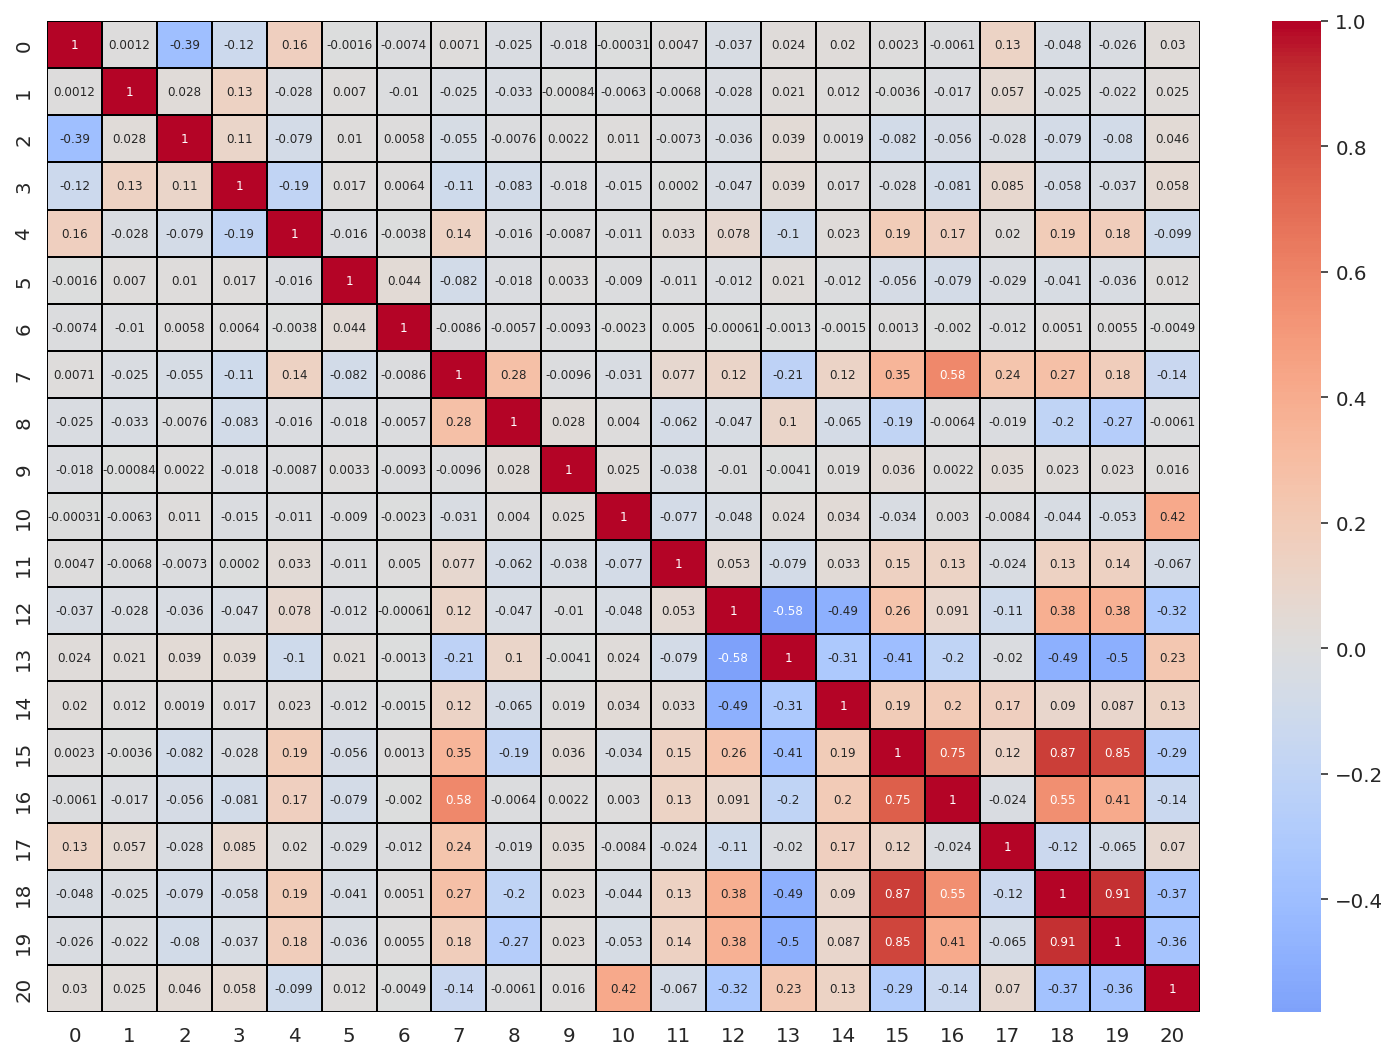

In [207]:
plt.figure(figsize=(13, 9), dpi=143)
sns.heatmap(
    X_encoded.corr(),
    annot=True,
    cmap='coolwarm',
    center=0,
    linewidths=1,
    linecolor='black',
    annot_kws={"size": 6}
)